In [1]:
# import the necessary libraries
import matplotlib
import numpy as np
import pandas as pd
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 12, 8
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
us_pollution = pd.read_csv('pollution_2000_2021.csv')

In [3]:
us_pollution

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,2021-06-26,2021,6,26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.040588,0.049,...,0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2
608695,2021-06-27,2021,6,27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.037882,0.042,...,0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2
608696,2021-06-28,2021,6,28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.039765,0.050,...,0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5
608697,2021-06-29,2021,6,29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.049176,0.058,...,0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7


In [4]:
us_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

### Missing value

In [5]:
us_pollution.isnull().sum()

Date                 0
Year                 0
Month                0
Day                  0
Address              0
State                0
County               0
City                 0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

In [6]:
mis_values_sum = sum(us_pollution.isnull().sum())
print(f"There are {mis_values_sum} missing values.")

There are 0 missing values.


In [7]:
# Convert string to datetime64
us_pollution['Date'] = pd.to_datetime(us_pollution['Date'])

### How many Cities?

In [8]:
cities = us_pollution['City'].value_counts()
print(f'There are {len(cities)} cities in the dataset.')
print(cities.index)

There are 148 cities in the dataset.
Index(['Not in a city', 'Los Angeles', 'New York', 'Phoenix', 'Rubidoux',
       'North Little Rock', 'Houston', 'Charlotte', 'El Paso', 'Washington',
       ...
       'West Los Angeles', 'Athens', 'Ladue', 'Ferguson', 'St. Ann', 'Kenner',
       'Bakersfield', 'Dentsville (Dents)', 'Memphis', 'Roosevelt'],
      dtype='object', length=148)


### Which cities are most polluted?

In [9]:
from IPython.display import display_html
def display_side_by_side(dfs,color):
    html_str=''
    for df in dfs:
        df = df[:10].style.set_precision(2).background_gradient(cmap=color)
        html_str += df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def max_polluted_city_overall(pollutant):
    pollutant_col = f'{pollutant} AQI'
    ordered = us_pollution[[pollutant_col,'City']].groupby(["City"]).mean().sort_values(by=pollutant_col,ascending=False).reset_index()
    ordered[pollutant_col] = round(ordered[pollutant_col],2)
    return ordered

def max_polluted_city_recent_five(pollutant):
    pollutant_col = f'{pollutant} AQI'
    ordered = us_pollution[us_pollution['Year'] > 2015][[pollutant_col,'City']].groupby(["City"]).mean().sort_values(by=pollutant_col,ascending=False).reset_index()
    ordered[pollutant_col] = round(ordered[pollutant_col],2)
    return ordered

def max_polluted_city_old_ten(pollutant):
    pollutant_col = f'{pollutant} AQI'
    ordered = us_pollution[us_pollution['Year'] < 2011][[pollutant_col,'City']].groupby(["City"]).mean().sort_values(by=pollutant_col,ascending=False).reset_index()
    ordered[pollutant_col] = round(ordered[pollutant_col],2)
    return ordered


def display_max_polluted_city_overall():
    o3_city = max_polluted_city_overall('O3')
    co_city = max_polluted_city_overall('CO')
    so2_city = max_polluted_city_overall('SO2')
    no3_city = max_polluted_city_overall('NO2')
    citysets=o3_city, co_city, so2_city, no3_city
    display_side_by_side(citysets,'OrRd')

def display_max_polluted_city_recent_five():
    o3_city = max_polluted_city_recent_five('O3')
    co_city = max_polluted_city_recent_five('CO')
    so2_city = max_polluted_city_recent_five('SO2')
    no3_city = max_polluted_city_recent_five('NO2')
    citysets=o3_city, co_city, so2_city, no3_city
    display_side_by_side(citysets,'OrRd')

def city_dif(pollutant):
    pollutant_col = f'{pollutant} AQI'
    pollutant_change = f'{pollutant} Change'
    city = max_polluted_city_recent_five(pollutant)
    city_old = max_polluted_city_old_ten(pollutant)
    dif = city
    dif[pollutant_change] = city[pollutant_col] - city_old[pollutant_col]
    return dif


def city_increase(pollutant):
    dif = city_dif(pollutant)
    pollutant_col = f'{pollutant} AQI'
    pollutant_change = f'{pollutant} Change'
    increase = dif.sort_values(by=pollutant_change,ascending=False).reset_index()
    increase = increase[['City', pollutant_col, pollutant_change]]
    return increase


def city_decrease(pollutant):
    dif = city_dif(pollutant)
    pollutant_col = f'{pollutant} AQI'
    pollutant_change = f'{pollutant} Change'
    decrease = dif.sort_values(by=pollutant_change,ascending=True).reset_index()
    decrease = decrease[['City', pollutant_col, pollutant_change]]
    return decrease


def display_city_increase():
    o3_increase = city_increase('O3')
    co_increase = city_increase('CO')
    so2_increase = city_increase('SO2')
    no3_increase = city_increase('NO2')
    increasesets=o3_increase,co_increase,so2_increase,no3_increase
    display_side_by_side(increasesets,'OrRd')

    
def display_city_decrease():
    o3_decrease = city_decrease('O3')
    co_decrease = city_decrease('CO')
    so2_decrease = city_decrease('SO2')
    no3_decrease = city_decrease('NO2')
    decreasesets=o3_decrease,co_decrease,so2_decrease,no3_decrease
    display_side_by_side(decreasesets,'GnBu_r')

In [10]:
display_max_polluted_city_overall()

,City,O3 AQI
0,Winston-Salem,66.12
1,Roosevelt,65.77
2,Rubidoux,63.08
3,Fontana,61.64
4,Ashland,59.19
5,Fresno,57.45
6,Victorville,57.16
7,Lancaster,55.95
8,Sunset Hills,55.23
9,Norristown,54.96


In [11]:
display_max_polluted_city_recent_five()

,City,O3 AQI
0,Rubidoux,64.20
1,Fontana,62.33
2,Victorville,55.68
3,Fresno,52.17
4,Calexico,49.07
5,Memphis,48.84
6,Phoenix,48.48
7,Midvale,46.92
8,Albuquerque,45.34
9,Reno,45.31


In [12]:
display_city_increase()

,City,O3 AQI,O3 Change
0,Fontana,62.33,-1.30
1,Rubidoux,64.20,-1.92
2,Vallejo,31.45,-5.29
3,Cornwall,32.48,-5.29
4,Boston,31.10,-5.32
5,Cleveland,32.51,-5.40
6,San Jose,32.78,-5.44
7,Newark,32.10,-5.52
8,Houston,31.64,-5.67
9,Not in a city,33.41,-5.69


In [13]:
display_city_decrease()

,City,O3 AQI,O3 Change
0,Fairbanks,19.90,-14.95
1,Lompoc,23.42,-11.77
2,Eureka,25.01,-10.52
3,Oakland,25.68,-9.93
4,Northbrook,44.91,-9.88
5,Tucson,44.41,-9.75
6,Dentsville (Dents),39.62,-9.70
7,Capitan,39.94,-9.63
8,Albuquerque,45.34,-9.62
9,Hampton,39.53,-9.56


### Pollution in City

In [14]:
def plotcity(city):
    city_data = us_pollution[us_pollution['City'] == city]
    select_city_data = city_data[['Date',
                                    'O3 AQI', 
                                    'CO AQI', 
                                    'SO2 AQI',
                                    'NO2 AQI']].copy(deep=False)

    select_city_data.set_index('Date', inplace=True)
    plot_title=f'{city} Pollution'
    select_city_data.plot(figsize=(10,4), title=plot_title,xlabel='Time')

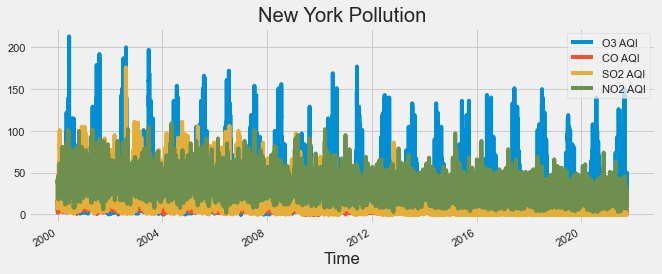

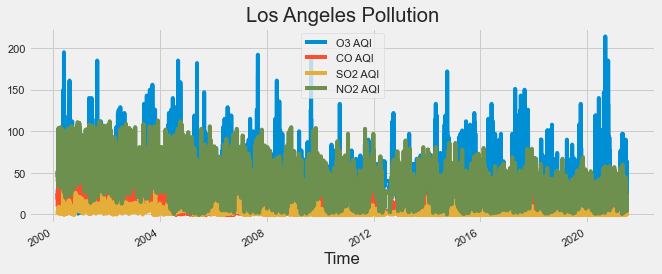

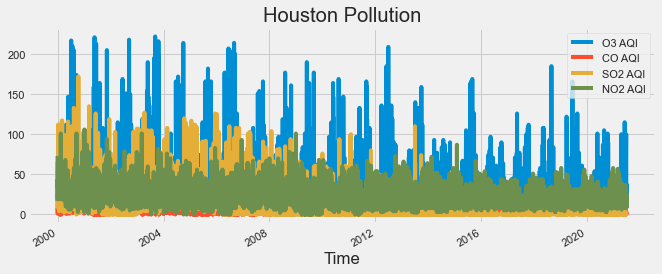

In [15]:
largest_cities = ['New York', 'Los Angeles', 'Houston']
for city in largest_cities:
    plotcity(city)

In [16]:
def plot_over_year_month(pollutant):
    pollutant='NO2'
    pollutant_col = f'{pollutant} AQI'
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='Year', y=pollutant_col, data=us_pollution[us_pollution['Year'] > 2010], ax=axes[0])
    sns.pointplot(x='Month', y=pollutant_col, data=us_pollution)
    axes[0].set_title('US Year-wise Box Plot', fontsize=18); 
    axes[1].set_title('US Month-wise Plot', fontsize=18)

    
def plot_year_month(city, pollutant):
    city_data = us_pollution[us_pollution['City'] == city]
    pollutant_col = f'{pollutant} AQI'
    select_city_data = city_data[['Date', 'Year', 'Month', pollutant_col]].copy(deep=False)
    select_city_data.set_index('Date', inplace=True)
    plot_title=f'{city} Pollution'
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='Year', y=pollutant_col, data=select_city_data[select_city_data['Year'] > 2010], ax=axes[0])
    sns.pointplot(x='Month', y=pollutant_col, data=select_city_data)
    axes[0].set_title(f'{city} Year-wise Box Plot', fontsize=18); 
    axes[1].set_title(f'{city} Month-wise Plot', fontsize=18)

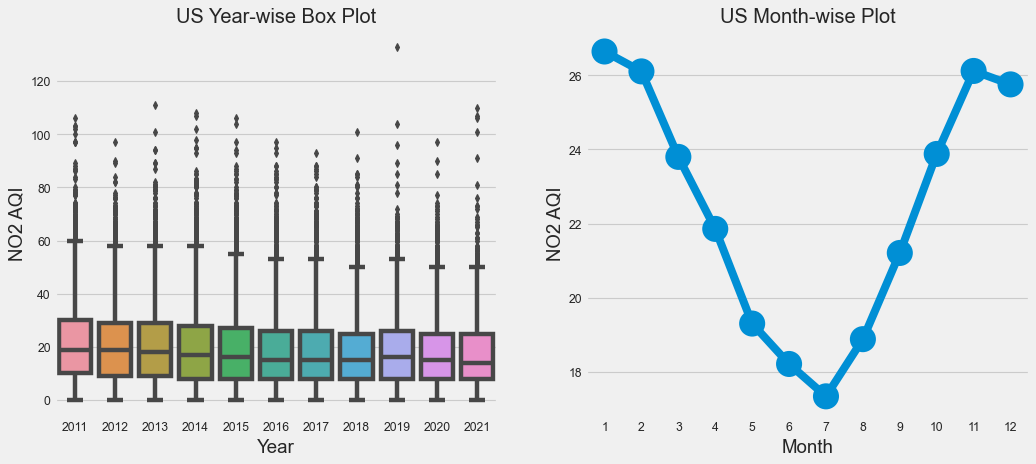

In [17]:
# pollutants = ['O3', 'CO', 'SO2','NO2']
# for pollutant in pollutants:
#     plot_over_year_month(pollutant)
plot_over_year_month('O3')

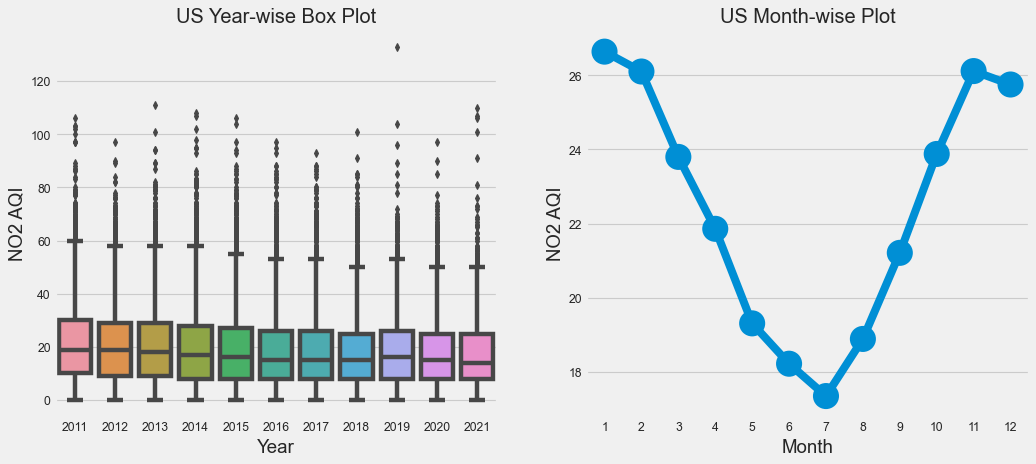

In [18]:
plot_over_year_month('CO')

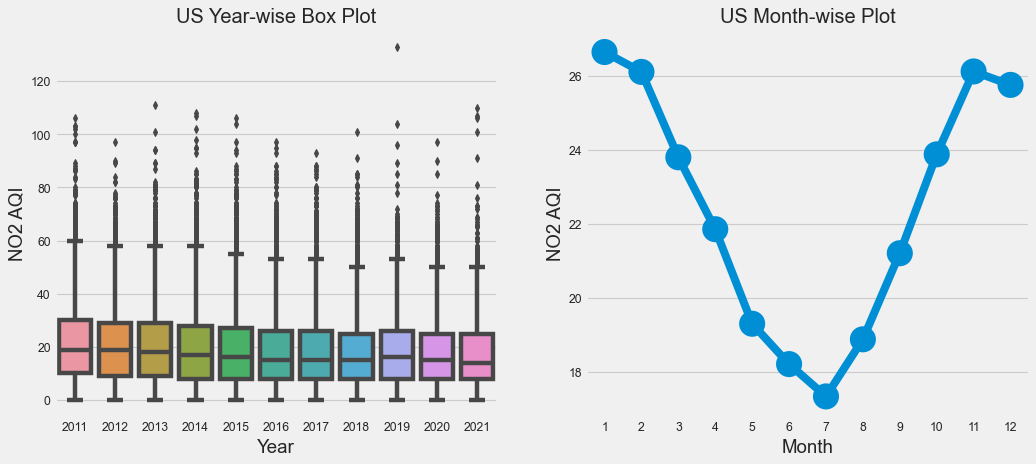

In [19]:
plot_over_year_month('SO2')

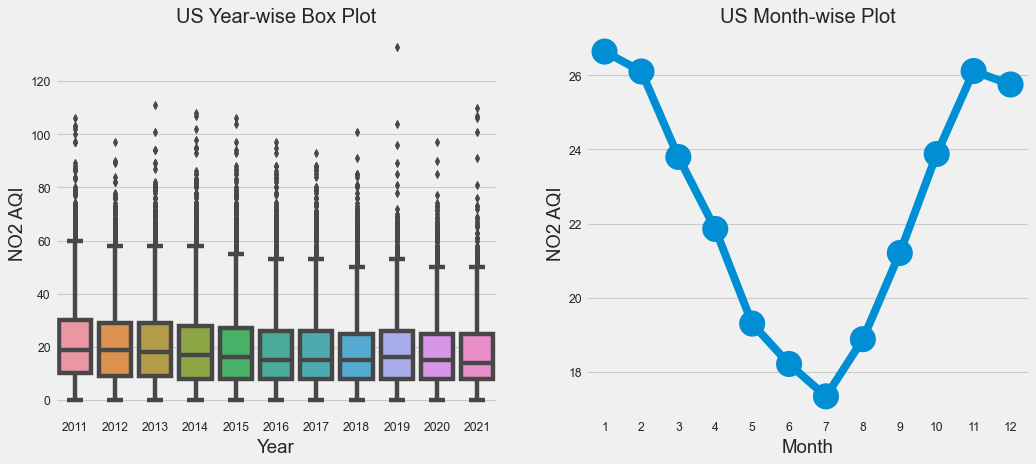

In [20]:
plot_over_year_month('NO2')

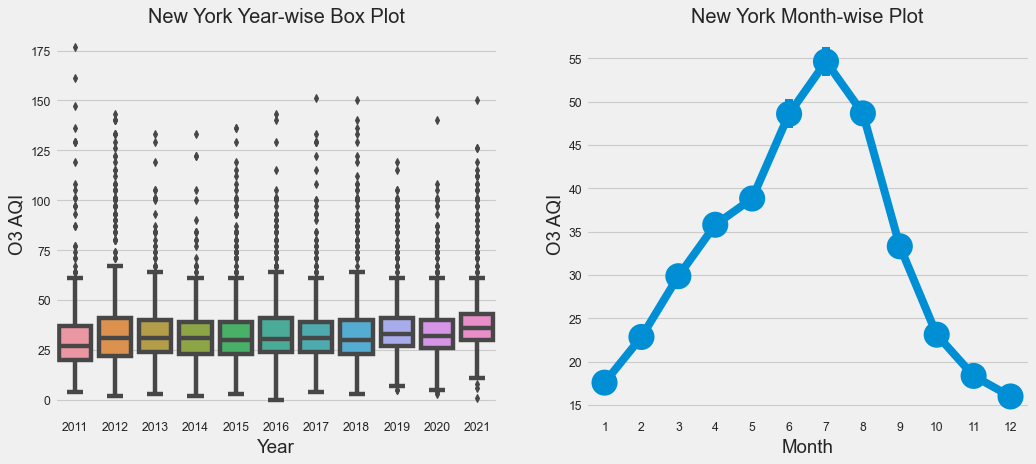

In [21]:
plot_year_month('New York', 'O3')

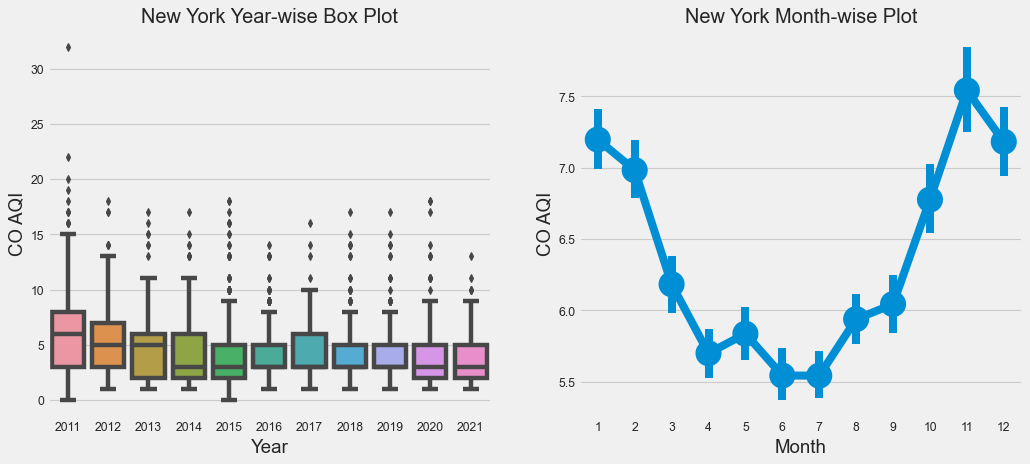

In [22]:
plot_year_month('New York', 'CO')

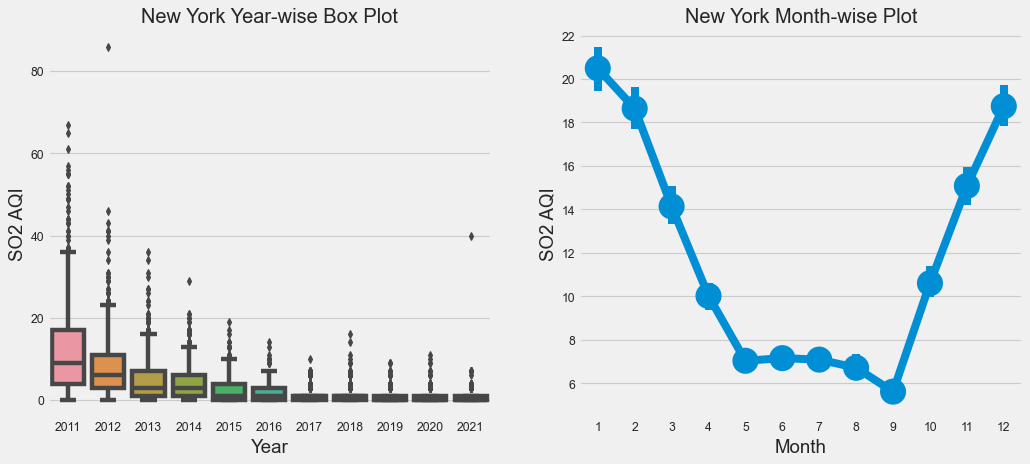

In [23]:
plot_year_month('New York', 'SO2')

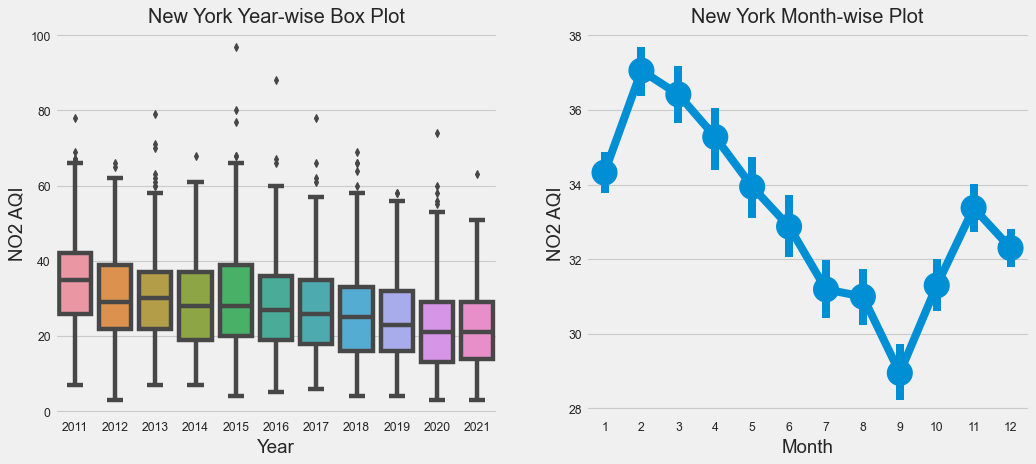

In [24]:
plot_year_month('New York', 'NO2')